In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = 'ex2data1.txt'
data = pd.read_csv(path,names=['x1','x2','y'])
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


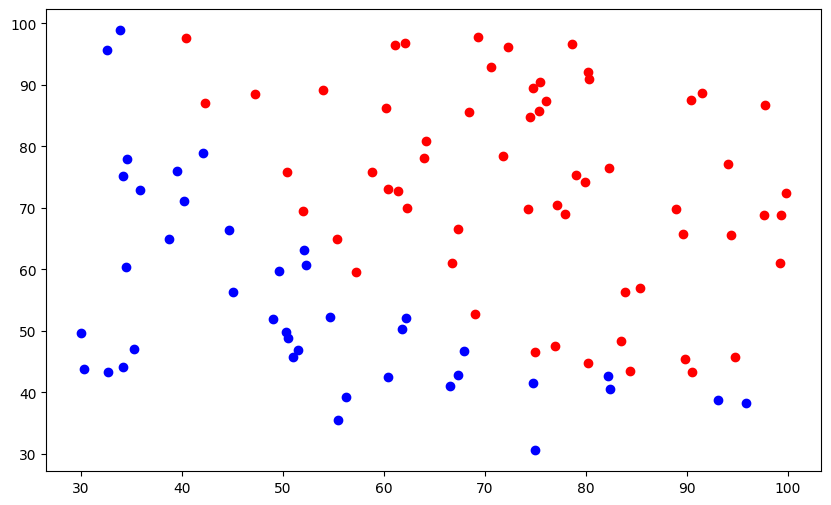

In [3]:
positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(positive['x1'],positive['x2'],c='r')
ax.scatter(negative['x1'],negative['x2'],c='b')

In [4]:
def sigmoid(X):
    return 1 / (1 +np.exp(-X))

In [5]:
def cost(theta,X,Y):
    first = Y.flatten()*np.log(sigmoid(X@theta))
    second = (1-Y.flatten())*np.log(1-sigmoid(X@theta))
    # print((-1/len(X)*(first+second)).shape)
    return np.sum(-1/len(X)*(first+second))

In [6]:
def gradient(theta,X,Y):
    # print(X.shape)
    # print(theta.shape)
    tem1 = sigmoid(X@theta) - Y.flatten()
    return tem1.T@X/len(X)

In [7]:
def make_feature(power,x1,x2):
    dict = {}
    for i in range(0,power+1):
        for j in range(0,i+1):
            dict['F{}{}'.format(i-j,j)] = np.power(x1,i-j)*np.power(x2,j)
    return pd.DataFrame(dict)
power = 1

In [8]:
X = data.iloc[:,0:2].values
Y = data.iloc[:,2:].values
print(X[:,0])
print(X.shape)
print(Y.shape)

[34.62365962 30.28671077 35.84740877 60.18259939 79.03273605 45.08327748
 61.10666454 75.02474557 76.0987867  84.43281996 95.86155507 75.01365839
 82.30705337 69.36458876 39.53833914 53.97105215 69.07014406 67.94685548
 70.66150955 76.97878373 67.37202755 89.67677575 50.53478829 34.21206098
 77.92409145 62.27101367 80.19018075 93.1143888  61.83020602 38.7858038
 61.37928945 85.40451939 52.10797973 52.04540477 40.23689374 54.63510555
 33.91550011 64.17698887 74.78925296 34.18364003 83.90239366 51.54772027
 94.44336777 82.36875376 51.04775177 62.22267576 77.19303493 97.77159928
 62.0730638  91.5649745  79.94481794 99.27252693 90.54671411 34.52451385
 50.28649612 49.58667722 97.64563396 32.57720017 74.24869137 71.79646206
 75.39561147 35.28611282 56.2538175  30.05882245 44.66826172 66.56089447
 40.45755098 49.07256322 80.27957401 66.74671857 32.72283304 64.03932042
 72.34649423 60.45788574 58.84095622 99.8278578  47.26426911 50.4581598
 60.45555629 82.22666158 88.91389642 94.83450672 67.3

In [9]:
data_new = make_feature(power,X[:,0],X[:,1])
data_new

,F00,F10,F01
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376
...,...,...,...
95,1.0,83.489163,48.380286
96,1.0,42.261701,87.103851
97,1.0,99.315009,68.775409
98,1.0,55.340018,64.931938


In [10]:
X_new = data_new.values
shapes = data_new.shape[1]
w = np.zeros(shapes)
X_new.shape

(100, 3)

In [11]:
from scipy.optimize import minimize

In [12]:
res = minimize(fun=cost,x0=w,args=(X_new,Y),method='TNC',jac=gradient)
res

 message: Local minimum reached (|pg| ~= 0)
 success: True
  status: 0
     fun: 0.20349770158947533
       x: [-2.516e+01  2.062e-01  2.015e-01]
     nit: 17
     jac: [ 9.005e-09  8.639e-08  4.721e-07]
    nfev: 36

In [13]:
cost(res.x,X_new,Y)

0.20349770158947533

In [14]:
a = np.array([[1,2,3,4],[1,2,3,4]])
a.ravel()

array([1, 2, 3, 4, 1, 2, 3, 4])

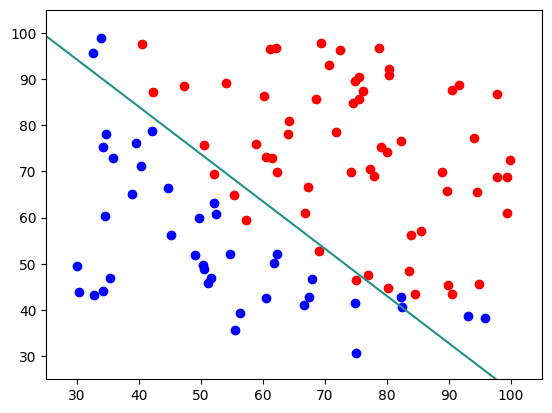

In [15]:
a = np.linspace(25,105,500)
b = np.linspace(25,105,500)
aa,bb = np.meshgrid(a,b)
z = make_feature(power,aa.ravel(),bb.ravel())

ZZ = z @ res.x
ZZ = np.array(ZZ)
ZZ = ZZ.reshape(aa.shape)
plt.contour(aa,bb,ZZ,0)
plt.scatter(positive['x1'],positive['x2'],c='r')
plt.scatter(negative['x1'],negative['x2'],c='b')
plt.show()